In [1]:
import os
import sys
import torch
from pathlib import Path

In [2]:
# DIRECTORIES
from graph_bridges import base_path
#results folder
from graph_bridges import results_path
#data folder 
from graph_bridges import data_path

In [3]:
# CONFIGURATIONS IMPORT
from graph_bridges.configs.graphs.config_sb import SBConfig,SBTrainerConfig
from graph_bridges.configs.graphs.config_sb import SteinSpinEstimatorConfig
from graph_bridges.configs.graphs.config_sb import ParametrizedSamplerConfig
from graph_bridges.configs.graphs.config_sb import get_sb_config_from_file

# DATA CONFIGS
from graph_bridges.data.graph_dataloaders_config import CommunitySmallConfig,EgoConfig
# BACKWARD RATES CONFIGS 
from graph_bridges.models.backward_rates.backward_rate_config import BackRateMLPConfig,GaussianTargetRateImageX0PredEMAConfig

In [4]:
# MODEL IMPORTS
from graph_bridges.models.generative_models.sb import SB
from graph_bridges.models.trainers.sb_training import SBTrainer

All the functionality of a schrodinger bridge is integrated in the class SB

#from graph_bridges.models.generative_models.sb import SB

The Schrodinger Bridge problem requieres essentially 3 elements for model building
    -P0, which is the sb.data_dataloader
    -P1 which is the sb.target_dataloader
    -The reference process which defines a measure Q:
     sb.reference_process

It requieres 2 models (architectures to be trained)
    -sb
    
Following the diffusers library architectures, it requieres a Scheduler and a Pipeline for Inference (Generation)

In [5]:
#===========================================
# MODEL SET UP
#===========================================
sb_config = SBConfig(delete=True,
                     experiment_name="graph",
                     experiment_type="sb",
                     experiment_indentifier="tutorial_sb_trainer")
"""
The results are stored in results_path/experiment_name/experiment_type/experiment_indentifier
if experiment_indentifier is set to None a timenumber (UNIXTIME) is created
"""

sb_config.data = EgoConfig(as_image=False,batch_size=20,full_adjacency=False)
sb_config.model = BackRateMLPConfig(time_embed_dim=14, hidden_layer=150)
sb_config.stein = SteinSpinEstimatorConfig(stein_sample_size=10)
sb_config.sampler = ParametrizedSamplerConfig(num_steps=5)
sb_config.trainer = SBTrainerConfig(learning_rate=1e-3,
                                    num_epochs=30,
                                    save_metric_epochs=10,
                                    save_model_epochs=10,
                                    save_image_epochs=10,
                                    device="cuda:0",
                                    metrics=["graphs_plots","histograms"])

cuda:0


5it [00:01,  4.14it/s]
5it [00:00, 837.72it/s]
5it [00:00, 1002.80it/s]
5it [00:00, 716.29it/s]
5it [00:00, 714.87it/s]
5it [00:00, 384.88it/s]
5it [00:00, 835.42it/s]
5it [00:00, 557.07it/s]
5it [00:00, 822.28it/s]
5it [00:00, 699.14it/s]
5it [00:00, 988.01it/s]
5it [00:00, 569.91it/s]
5it [00:00, 947.95it/s]
5it [00:00, 415.11it/s]
5it [00:00, 955.55it/s]
5it [00:00, 393.11it/s]
5it [00:00, 825.78it/s]
5it [00:00, 713.85it/s]
5it [00:00, 393.23it/s]
  0%|                                                                                                | 0/30 [00:00<?, ?it/s]
5it [00:00, 720.94it/s]

5it [00:00, 626.82it/s]

5it [00:00, 831.15it/s]

5it [00:00, 716.31it/s]

5it [00:00, 624.15it/s]

5it [00:00, 454.63it/s]

5it [00:00, 835.59it/s]

5it [00:00, 770.64it/s]

5it [00:00, 839.90it/s]

5it [00:00, 457.01it/s]

5it [00:00, 835.65it/s]

5it [00:00, 996.04it/s]

5it [00:00, 455.81it/s]

5it [00:00, 501.39it/s]

5it [00:00, 454.43it/s]

5it [00:00, 500.51it/s]
  3%|██▉            

Epoch: 1, Loss: 0.09616264116307643



5it [00:00, 455.93it/s]

5it [00:00, 789.74it/s]

5it [00:00, 835.12it/s]

5it [00:00, 611.36it/s]

5it [00:00, 716.29it/s]

5it [00:00, 831.08it/s]

5it [00:00, 806.41it/s]

5it [00:00, 825.72it/s]

5it [00:00, 464.15it/s]

5it [00:00, 463.14it/s]

5it [00:00, 687.37it/s]

5it [00:00, 945.51it/s]

5it [00:00, 803.97it/s]

5it [00:00, 824.06it/s]

5it [00:00, 438.56it/s]

5it [00:00, 761.33it/s]
  7%|█████▊                                                                                  | 2/30 [00:00<00:07,  3.69it/s]
5it [00:00, 712.98it/s]

5it [00:00, 803.94it/s]

5it [00:00, 826.20it/s]

5it [00:00, 819.81it/s]

5it [00:00, 1002.13it/s]

5it [00:00, 809.24it/s]

5it [00:00, 813.95it/s]

5it [00:00, 832.27it/s]

5it [00:00, 716.26it/s]

5it [00:00, 830.82it/s]

5it [00:00, 716.41it/s]

5it [00:00, 715.75it/s]

5it [00:00, 526.91it/s]

5it [00:00, 626.78it/s]

5it [00:00, 499.79it/s]

5it [00:00, 716.34it/s]
 10%|████████▊                                                             

Epoch: 11, Loss: 0.006165771618028532



5it [00:00, 835.45it/s]

5it [00:00, 626.58it/s]

5it [00:00, 830.46it/s]

5it [00:00, 716.39it/s]

5it [00:00, 716.31it/s]

5it [00:00, 454.70it/s]

5it [00:00, 765.83it/s]

5it [00:00, 716.66it/s]

5it [00:00, 830.72it/s]

5it [00:00, 831.08it/s]

5it [00:00, 501.35it/s]

5it [00:00, 828.06it/s]

5it [00:00, 909.83it/s]

5it [00:00, 831.64it/s]

5it [00:00, 712.54it/s]

5it [00:00, 499.64it/s]
 40%|██████████████████████████████████▊                                                    | 12/30 [00:05<00:11,  1.58it/s]
5it [00:00, 836.29it/s]

5it [00:00, 827.12it/s]

5it [00:00, 716.07it/s]

5it [00:00, 832.14it/s]

5it [00:00, 500.13it/s]

5it [00:00, 832.17it/s]

5it [00:00, 715.97it/s]

5it [00:00, 501.35it/s]

5it [00:00, 501.36it/s]

5it [00:00, 716.31it/s]

5it [00:00, 836.25it/s]

5it [00:00, 835.55it/s]

5it [00:00, 475.84it/s]

5it [00:00, 456.06it/s]

5it [00:00, 501.08it/s]

5it [00:00, 416.60it/s]
 43%|█████████████████████████████████████▋                                 

Epoch: 21, Loss: -0.6042762574649476



5it [00:00, 716.14it/s]

5it [00:00, 501.36it/s]

5it [00:00, 500.37it/s]

5it [00:00, 835.59it/s]

5it [00:00, 716.19it/s]

5it [00:00, 835.55it/s]

5it [00:00, 455.79it/s]

5it [00:00, 835.42it/s]

5it [00:00, 1009.51it/s]

5it [00:00, 835.65it/s]

5it [00:00, 716.24it/s]

5it [00:00, 716.19it/s]

5it [00:00, 501.33it/s]

5it [00:00, 835.09it/s]

5it [00:00, 498.27it/s]

5it [00:00, 835.62it/s]
 73%|███████████████████████████████████████████████████████████████▊                       | 22/30 [00:10<00:05,  1.53it/s]
5it [00:00, 455.76it/s]

5it [00:00, 716.19it/s]

5it [00:00, 715.82it/s]

5it [00:00, 715.85it/s]

5it [00:00, 502.47it/s]

5it [00:00, 719.34it/s]

5it [00:00, 455.81it/s]

5it [00:00, 838.16it/s]

5it [00:00, 835.85it/s]

5it [00:00, 835.92it/s]

5it [00:00, 716.26it/s]

5it [00:00, 417.75it/s]

5it [00:00, 835.59it/s]

5it [00:00, 667.22it/s]

5it [00:00, 417.77it/s]

5it [00:00, 716.17it/s]
 77%|██████████████████████████████████████████████████████████████████▋   

tensor(1.1023, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)

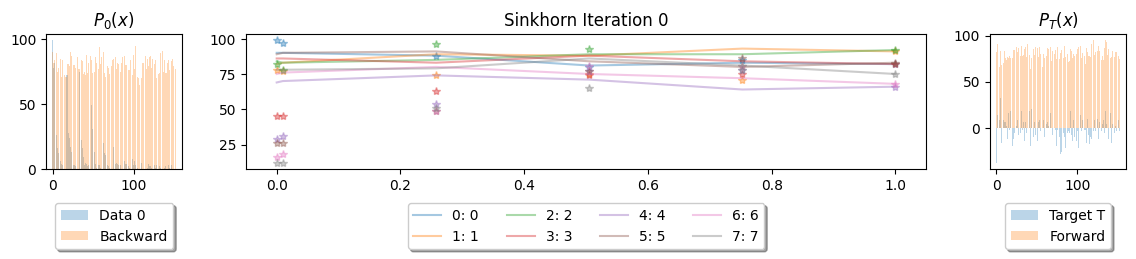

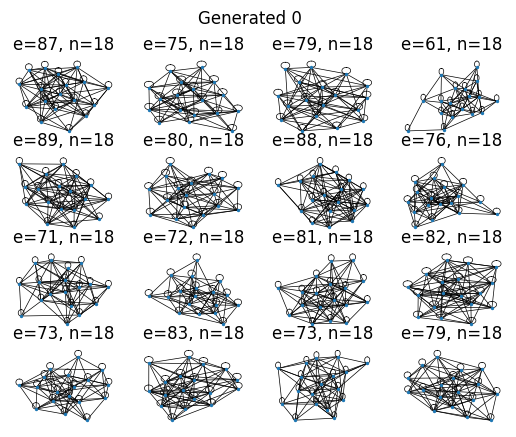

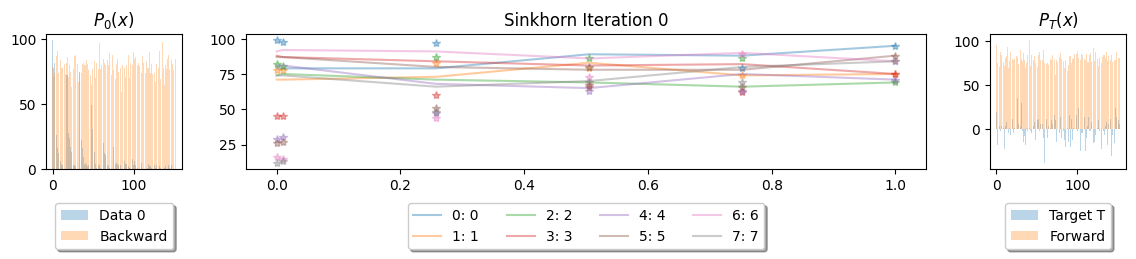

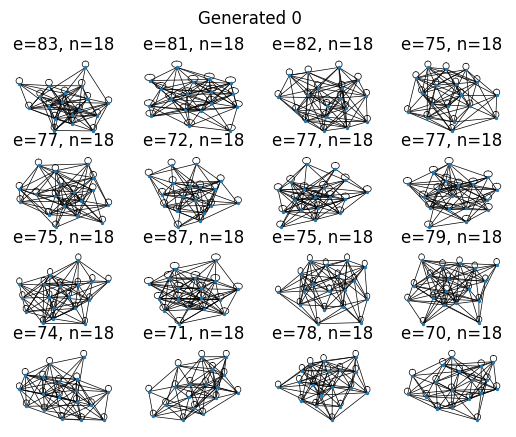

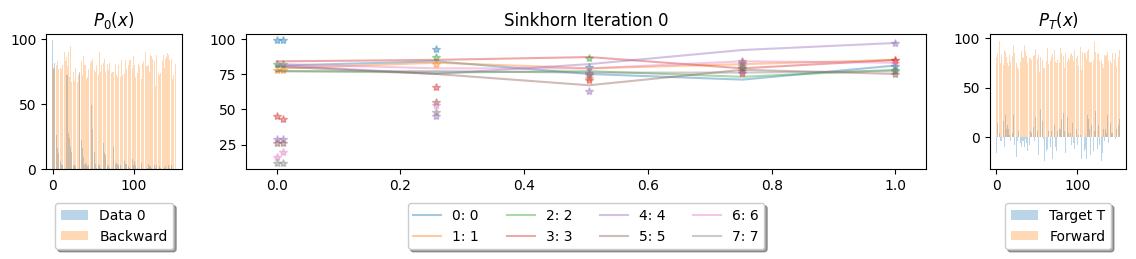

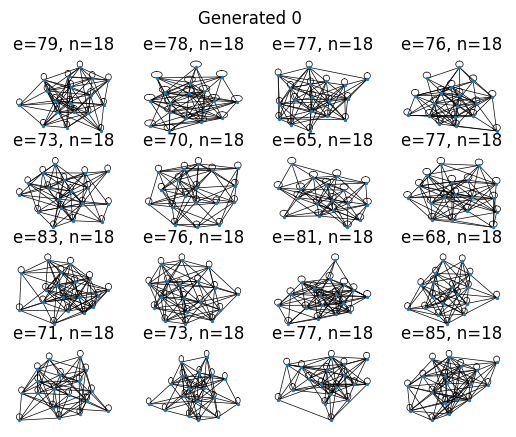

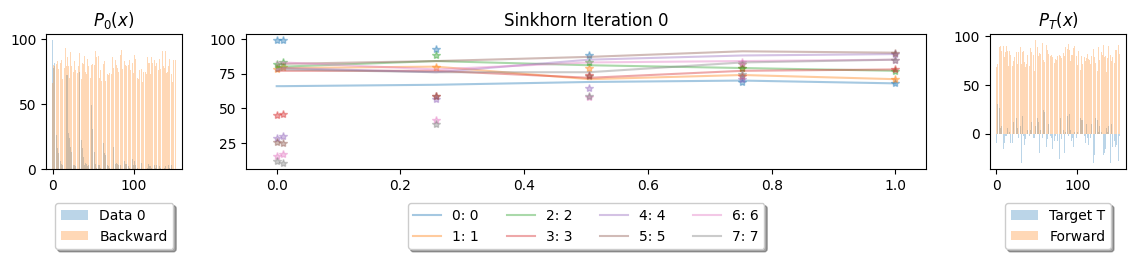

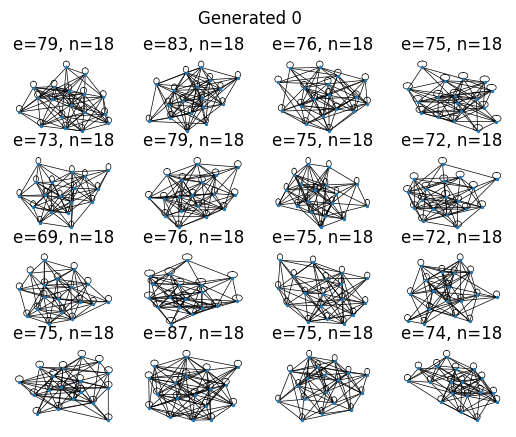

In [6]:
#========================================
# TRAIN
#========================================
sb_trainer = SBTrainer(sb_config)
sb_trainer.train_schrodinger()

In [7]:
sb_trained = SB()
sb_trained.load_from_results_folder(experiment_name="graph",
                                    experiment_type="sb",
                                    experiment_indentifier="tutorial_sb_trainer",
                                    sinkhorn_iteration_to_load=0)

In [8]:
sb_trained.past_model

BackRateMLP(
  (f1): Linear(in_features=153, out_features=150, bias=True)
  (f2): Linear(in_features=164, out_features=306, bias=True)
)

In [9]:
x_end = sb_trained.pipeline(None, 
                            0, 
                            torch.device("cpu"), 
                            sample_size=32, 
                            return_path=False)

5it [00:00, 719.68it/s]


In [10]:
#the results are as spins
x_end.min(),x_end.max()

(tensor(-1.), tensor(1.))

In [11]:
x_adj = sb_trained.data_dataloader.transform_to_graph(x_end)

In [14]:
x_end.shape

torch.Size([32, 153])

In [ ]:
from